### Annual vs Monthly Averages

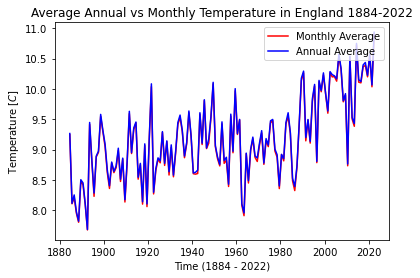

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

year = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tas_hadukgrid_uk_country_ann_188401-202212.nc")
month = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tas_hadukgrid_uk_country_mon_188401-202212.nc")

tas_array = np.array(year['tas'])
tasm_array = np.array(month['tas'])
time_array = np.array(year['time'])


temp = block_reduce(tasm_array, block_size=(12,1), func=np.mean, cval=np.mean(tasm_array))

plt.plot(time_array, temp[:,1], 'r', label='Monthly Average')
plt.plot(time_array, tas_array[:,1], 'b', label='Annual Average')
plt.legend(loc='upper right')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual vs Monthly Temperature in England 1884-2022')
plt.rcParams.update({'font.size': 12})
plt.show()

### Annual Average from Months starting from December 

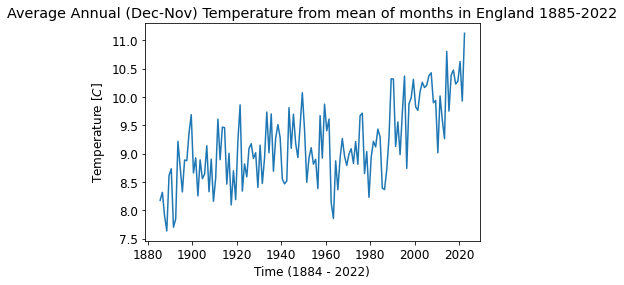

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

year = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tas_hadukgrid_uk_country_ann_188401-202212.nc")
month = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tas_hadukgrid_uk_country_mon_188401-202212.nc")

tasm_array = np.array(month['tas'])
time_array = np.array(year['time'])
timem_array = np.array(month['time'])

tasm_array = tasm_array[:,1]
temp = block_reduce(tasm_array[11:1667], block_size=(12), func=np.mean, cval=np.mean(tasm_array[11:1667]))


plt.plot(time_array[1:], temp)
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual (Dec-Nov) Temperature from mean of months in England 1885-2022')
plt.rcParams.update({'font.size': 12})

### December year vs January year

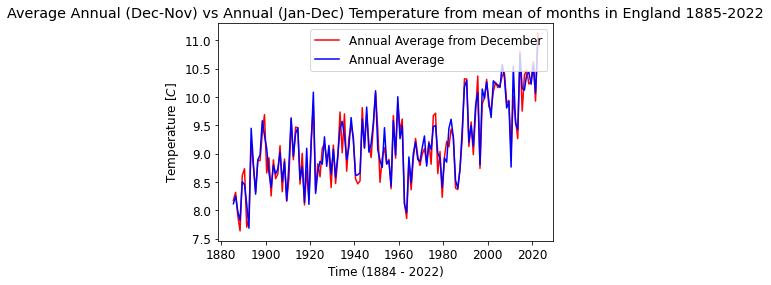

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

year = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tas_hadukgrid_uk_country_ann_188401-202212.nc")
month = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tas_hadukgrid_uk_country_mon_188401-202212.nc")

tasm_array = np.array(month['tas'])
tasy_array = np.array(year['tas'])
timey_array = np.array(year['time'])
timem_array = np.array(month['time'])

tasy_array = tasy_array[:,1]
tasm_array = tasm_array[:,1]
temp = block_reduce(tasm_array[11:1667], block_size=(12), func=np.mean, cval=np.mean(tasm_array[11:1667]))


plt.plot(timey_array[1:], temp, 'r', label='Annual Average from December')
plt.plot(timey_array[1:], tasy_array[1:], 'b', label='Annual Average')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual (Dec-Nov) vs Annual (Jan-Dec) Temperature from mean of months in England 1885-2022')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='upper right')


### UK Temperature Map for 25 km$^2$

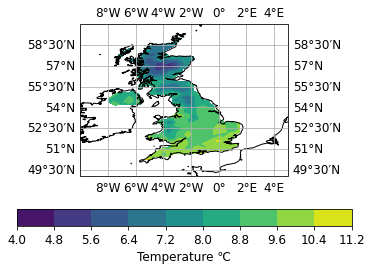

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\25km_Month_Temp\*.nc", parallel=True)

temp = np.array(data['tas'])

lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

mean_temp = np.mean(temp, axis=0)

plt.figure()

# Create a Cartopy projection with the desired extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-10, 5, 49, 60])

# Add coastlines and gridlines
ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)

# Create a contour plot for the mean temperature field
contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)

# Add a colorbar
cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Temperature \u2103")

plt.show()

### U.K. Temperature Annual Average

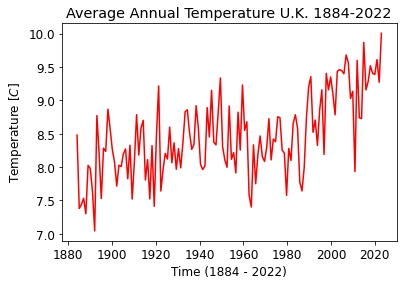

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\25km_Month_Temp\*.nc", parallel=True)

tas_array = np.array(data['tas'])
time_array = np.array(data['time'])
lat = np.array(data['latitude'])
long = np.array(data['longitude'])

#temp = block_reduce(tas_array, block_size=(12,1,1), func=np.mean, cval=np.mean(tas_array))
num_years = 1668 // 12
temp_reshaped = tas_array[:num_years * 12].reshape(num_years, 12, -1)  

temp_mean = np.nanmean(temp_reshaped, axis=(1, 2))

time = np.linspace(1884,2023, 139)

plt.plot(time, temp_mean, 'r')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual Temperature U.K. 1884-2022')
plt.rcParams.update({'font.size': 12})

### North vs South U.K. Temperature

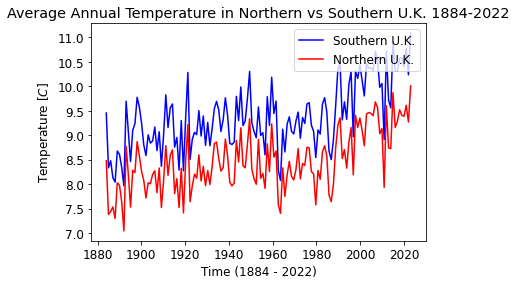

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\25km_Month_Temp\*.nc", parallel=True)

tas_array = np.array(data['tas'])
lat = np.array(data['latitude'])


northern_lat_threshold = 54.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 1668 // 12
temp_reshaped = tas_array[:num_years * 12].reshape(num_years, 12, -1)  

# Calculating mean temperature for each year in the Northern U.K.
temp_mean_north = np.nanmean(temp_reshaped[:, :, northern_lat_index:], axis=(1, 2))

time = np.linspace(1884,2023, 139)

southern_lat_threshold = 54.0
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]

# Calculate the mean temperature for each year in the Southern U.K.
temp_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    temp_year = tas_array[start_idx:end_idx, :southern_lat_index, :]
    temp_mean_south[i] = np.nanmean(temp_year)

plt.plot(time, temp_mean_south, 'b', label='Southern U.K.')
plt.plot(time, temp_mean_north, 'r', label='Northern U.K.')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual Temperature in Northern vs Southern U.K. 1884-2022')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='upper right')

### East vs West U.K. Temperature

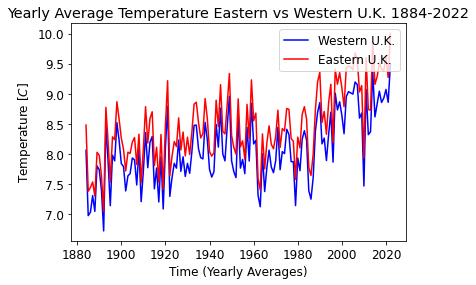

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce


# Load your data as you did before
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\25km_Month_Temp\*.nc", parallel=True)
tas_array = np.array(data['tas'])
time = np.array(data['time'])
lon = np.array(data['longitude'])
lat = np.array(data['latitude'])

longitude_threshold = -2.0

# Find the index where longitude crosses the threshold
eastern_lon_index = np.where(lon <= longitude_threshold)[0][-1]

# Calculate the mean temperature for each year in the eastern U.K.
num_years = 1668 // 12
temp_mean_eastern_uk = np.empty(num_years)

for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    temp_year = tas_array[start_idx:end_idx, :, :eastern_lon_index + 1]
    temp_mean_eastern_uk[i] = np.nanmean(temp_year)


dividing_lon = -2.0

western_mask = lon <= dividing_lon

# Reshape the temperature data to have (time, lat, lon)
temp_reshaped = tas_array[:, :, :]

# Reshape the western_mask to match the dimensions of temp_reshaped
reshaped_western_mask = western_mask.reshape(1, western_mask.shape[0], western_mask.shape[1])

annual_temp_mean_west_uk = np.nanmean(temp_reshaped[:, reshaped_western_mask[0]], axis=(1,))

temp = block_reduce(annual_temp_mean_west_uk, block_size=(12), func=np.mean, cval=np.mean(annual_temp_mean_west_uk))

# Create an array for the years
years = np.arange(1884, 2023)


plt.plot(years, temp, 'b', label='Western U.K.')
plt.plot(years, temp_mean_eastern_uk, 'r', label='Eastern U.K.')
plt.xlabel('Time (Yearly Averages)')
plt.ylabel('Temperature $[C]$')
plt.title('Yearly Average Temperature Eastern vs Western U.K. 1884-2022')
plt.legend(loc='upper right')
plt.rcParams.update({'font.size': 12})

plt.show()

### Newquay vs Birmingham

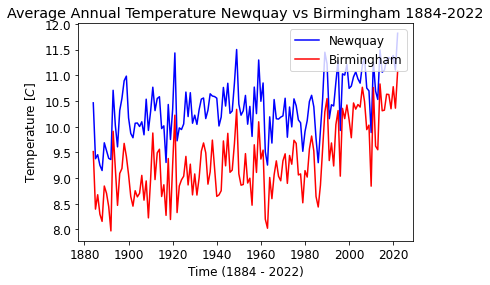

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce


data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\25km_Month_Temp\*.nc", parallel=True)
tas_array = np.array(data['tas'])
time = np.array(data['time'])
lon = np.array(data['longitude'])
lat = np.array(data['latitude'])
x = np.array(data['projection_x_coordinate'])
y = np.array(data['projection_y_coordinate'])

temp = block_reduce(tas_array, block_size=(12,1,1), func=np.mean, cval=np.mean(tas_array))

time = np.linspace(1884,2022,139)


plt.plot(time, temp[:,5,14], 'b', label='Newquay')
plt.plot(time, temp[:,15,23], 'r', label='Birmingham')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual Temperature Newquay vs Birmingham 1884-2022')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='upper right')

Can see higher avg temperature for Newquay (coastal) than Birmingham (inland). This may be due to the difference in latitude though. See next section for comparisons with similar latitude.

### Aberyswyth vs Birmingham

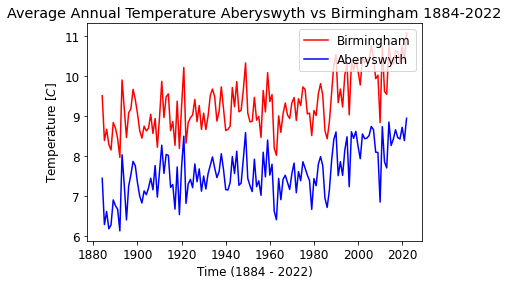

In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce


data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\25km_Month_Temp\*.nc", parallel=True)
tas_array = np.array(data['tas'])
time = np.array(data['time'])
lon = np.array(data['longitude'])
lat = np.array(data['latitude'])
x = np.array(data['projection_x_coordinate'])
y = np.array(data['projection_y_coordinate'])

temp = block_reduce(tas_array, block_size=(12,1,1), func=np.mean, cval=np.mean(tas_array))

time = np.linspace(1884,2022,139)


#plt.plot(time, temp[:,5,14], 'b', label='Newquay')
plt.plot(time, temp[:,15,23], 'r', label='Birmingham')
plt.plot(time, temp[:,15,19], 'b', label='Aberyswyth')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual Temperature Aberyswyth vs Birmingham 1884-2022')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='upper right')


As can be seen by the above graph, Aberyswyth, a coastal region with same latitude as Birmingham, has a considerably lower average temperature than Birmingham. 

### Liverpool vs Sheffield

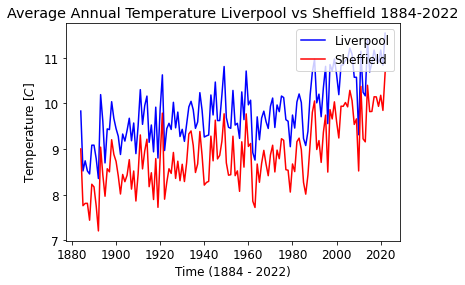

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce


data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\25km_Month_Temp\*.nc", parallel=True)
tas_array = np.array(data['tas'])
time = np.array(data['time'])
lon = np.array(data['longitude'])
lat = np.array(data['latitude'])
x = np.array(data['projection_x_coordinate'])
y = np.array(data['projection_y_coordinate'])

temp = block_reduce(tas_array, block_size=(12,1,1), func=np.mean, cval=np.mean(tas_array))

time = np.linspace(1884,2022,139)


#plt.plot(time, temp[:,5,14], 'b', label='Newquay')
#plt.plot(time, temp[:,15,23], 'r', label='Birmingham')
#plt.plot(time, temp[:,15,19], 'b', label='Aberyswyth')
plt.plot(time, temp[:,19,21], 'b', label='Liverpool')
plt.plot(time, temp[:,19,25], 'r', label='Sheffield')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual Temperature Liverpool vs Sheffield 1884-2022')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='upper right')


In this example the coastal region (Liverpool) is warmer than the inland region (Sheffield). This contrasts with the previous example. This may be due to Aberyswyth being further west than Liverpool and is more exposed to the Atlantic.